# **1. Importing Necessary Libraries:**

In [1]:
import numpy as np  # For numerical computing
import pandas as pd  # For data handling and manipulation
import matplotlib.pyplot as plt  # For plotting graphs

from sklearn.model_selection import train_test_split  # For splitting data
from sklearn.pipeline import Pipeline  # For creating pipelines of transformations and models
from sklearn.preprocessing import StandardScaler, OneHotEncoder  # For scaling numerical data and encoding categorical variables
from sklearn.linear_model import LogisticRegression  # Logistic Regression model
from sklearn.svm import SVC  # Support Vector Machine model
from sklearn.metrics import classification_report, roc_auc_score, roc_curve # Model evaluation metrics

import tensorflow as tf  # Deep learning framework
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier  # Scikit-learn wrapper for Keras models

# **2. Loading and understanding the dataset:**

In [2]:
# Loading dataset into a dataframe
df1 = pd.read_csv("hf://datasets/marianeft/diabetes_prediction_dataset/diabetes_prediction_dataset.csv")

# Creating a copy of dataset to work on
df = df1.copy()

# Printing first 5 rows
print(df.head())

# Checking data types and missing values
print(df.info())

# Summary statistics of numerical columns
print(df.describe())

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age               

# **3. Data preprocessing:**

# A. Checking for missing values:

In [3]:
# Checking for null valules
print(df.isnull().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


# B. Checking gender-wise distribution of diabetes:

Gender Count:
Female    58552
Male      41430
Other        18

Gender Percentage:
Female    58.552
Male      41.430
Other      0.018
Percentage of people in each gender with diabetes:
Female    7.618869
Male      9.748974
Other     0.000000


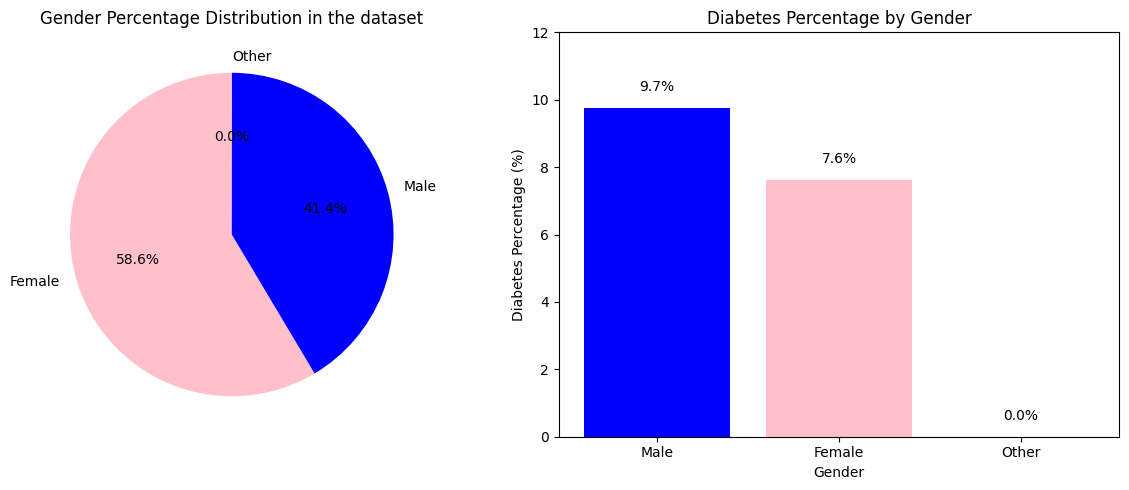

In [4]:
# Getting count distribution of genders
gender_counts = df['gender'].value_counts()

# Getting percentage distribution of genders
gender_percentage = df['gender'].value_counts(normalize=True) * 100

# Calculating percentage of people in each gender who have diabetes
diabetes_percentage = df.groupby('gender')['diabetes'].mean() * 100

print("Gender Count:")
print(gender_counts.to_string(header=False))
print("\nGender Percentage:")
print(gender_percentage.to_string(header=False))
print("Percentage of people in each gender with diabetes:")
print(diabetes_percentage.to_string(header=False))

#Visualization
color_map = {"male": "blue", "female": "pink"}
plt.figure(figsize=(12, 5))

# Pie Chart: Gender Percentage Distribution
pie_colors = [color_map.get(g.lower(), "gray") for g in gender_percentage.index]
plt.subplot(1, 2, 1)
plt.pie(gender_percentage, labels=gender_percentage.index, autopct='%1.1f%%', startangle=90, colors=pie_colors)
plt.title("Gender Percentage Distribution in the dataset")

# Bar Chart: Diabetes Percentage by Gender
diabetes_percentage_ordered = diabetes_percentage.sort_values(ascending=False)
bar_colors = [color_map.get(g.lower(), "gray") for g in diabetes_percentage_ordered.index]
plt.subplot(1, 2, 2)
plt.bar(diabetes_percentage_ordered.index, diabetes_percentage_ordered.values, color=bar_colors)
plt.title("Diabetes Percentage by Gender")
plt.xlabel("Gender")
plt.ylabel("Diabetes Percentage (%)")
plt.ylim(0, 12)
for i, value in enumerate(diabetes_percentage_ordered.values):
    plt.text(i, value + 0.5, f"{value:.1f}%", ha="center")

plt.tight_layout()
plt.show()


# C. Checking smoking history-wise distribution of diabetes:

Smoking History Count:
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004

Smoking History Percentage:
No Info        35.816
never          35.095
former          9.352
current         9.286
not current     6.447
ever            4.004

Percentage of people in each smoking history with diabetes:
No Info         4.059638
current        10.208917
ever           11.788212
former         17.001711
never           9.534122
not current    10.702652


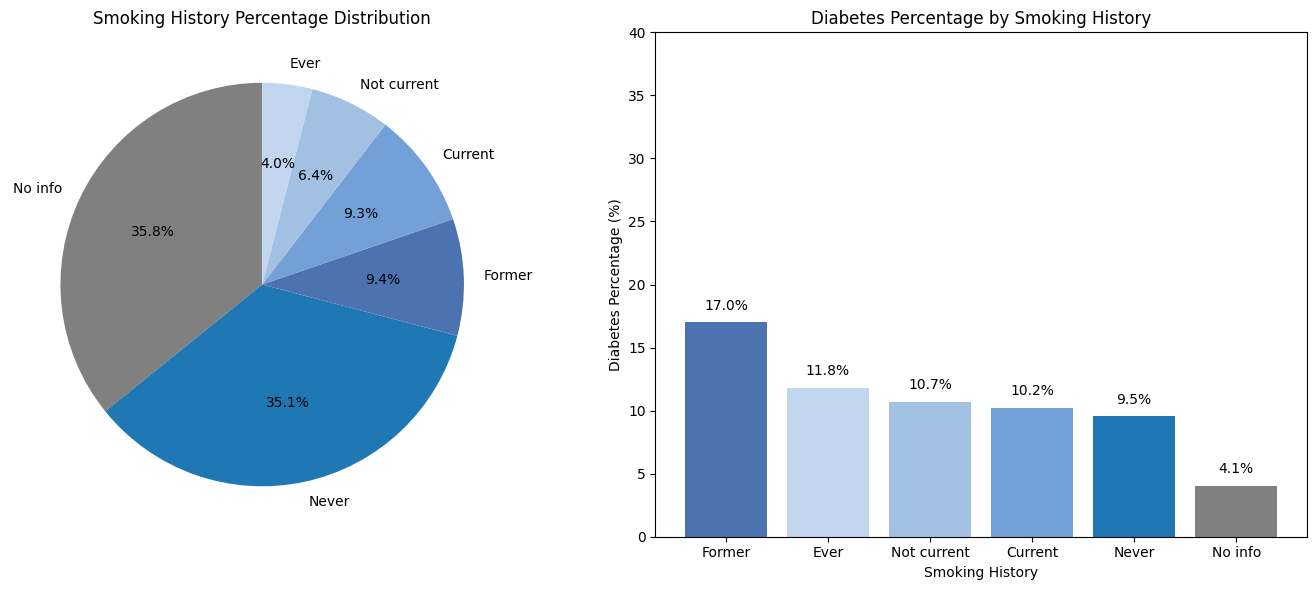

In [5]:
# Getting count distribution of smoking history
smoking_history_counts = df['smoking_history'].value_counts()

# Getting percentage distribution of smoking history
smoking_history_percentage = df['smoking_history'].value_counts(normalize=True) * 100

# Calculating percentage of people in each smoking history who have diabetes
diabetes_percentage_smoking = df.groupby('smoking_history')['diabetes'].mean() * 100

print("Smoking History Count:")
print(smoking_history_counts.to_string(header=False))
print("\nSmoking History Percentage:")
print(smoking_history_percentage.to_string(header=False))
print("\nPercentage of people in each smoking history with diabetes:")
print(diabetes_percentage_smoking.to_string(header=False))

# Visualization
color_map = {
    "never": "#1f77b4",
    "former": "#4c72b0",
    "current": "#74a0d8",
    "not current": "#a2c0e2",
    "ever": "#c2d5ef"
}
plt.figure(figsize=(14, 6))

# Pie Chart : Smoking History Percentage Distribution
pie_labels = [label.capitalize() for label in smoking_history_percentage.index]
pie_sizes = smoking_history_percentage.values
pie_colors = [color_map.get(label.lower(), "gray") for label in pie_labels]
plt.subplot(1, 2, 1)
plt.pie(pie_sizes, labels=pie_labels, autopct='%1.1f%%', startangle=90, colors=pie_colors)
plt.title("Smoking History Percentage Distribution")
plt.subplot(1, 2, 2)

# Bar Chart : Diabetes Percentage by Smiking History
diabetes_sorted = diabetes_percentage_smoking.sort_values(ascending=False)
bar_labels = [label.capitalize() for label in diabetes_sorted.index]
bar_values = diabetes_sorted.values
bar_colors = [color_map.get(label.lower(), "gray") for label in bar_labels]
bars = plt.bar(bar_labels, bar_values, color=bar_colors)
plt.title("Diabetes Percentage by Smoking History")
plt.xlabel("Smoking History")
plt.ylabel("Diabetes Percentage (%)")
plt.ylim(0, 40)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1, f"{height:.1f}%", ha="center")

plt.tight_layout()
plt.show()

# D. Encoding categorical variables:

In [6]:
# Encoding genders based on the distribution of diabetes in them
df['gender'] = df['gender'].map({'Male': 2, 'Female': 1, 'Other': 0})

# Initializing OneHotEncoder
encoder = OneHotEncoder(drop=None)

# Fiting and transforming the "smoking_history" column and converting it to a dense array
encoded_array = encoder.fit_transform(df[['smoking_history']]).toarray()

# Converting the encoded data into a DataFrame
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(['smoking_history']), index=df.index)

# Concatenating the encoded columns with the original DataFrame (excluding the original 'smoking_history' column)
df = pd.concat([df.drop(columns=['smoking_history']), encoded_df], axis=1)

# Displaying the modified dataset
print(df.head())

   gender   age  hypertension  heart_disease    bmi  HbA1c_level  \
0       1  80.0             0              1  25.19          6.6   
1       1  54.0             0              0  27.32          6.6   
2       2  28.0             0              0  27.32          5.7   
3       1  36.0             0              0  23.45          5.0   
4       2  76.0             1              1  20.14          4.8   

   blood_glucose_level  diabetes  smoking_history_No Info  \
0                  140         0                      0.0   
1                   80         0                      1.0   
2                  158         0                      0.0   
3                  155         0                      0.0   
4                  155         0                      0.0   

   smoking_history_current  smoking_history_ever  smoking_history_former  \
0                      0.0                   0.0                     0.0   
1                      0.0                   0.0                     0.0

# E. Features and Target Split:

In [7]:
# Features (X) and Target (y)
X = df.drop(columns=['diabetes'])
Y = df['diabetes']

# F. Test and Train Split:

In [8]:
# Split into 75% training and 25% testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42, stratify=Y)

# **4. Model building:**

In [9]:
# For storing results of all the models
results = {}

# A. Logistic Regression Model:

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     22875
           1       0.86      0.64      0.73      2125

    accuracy                           0.96     25000
   macro avg       0.92      0.81      0.86     25000
weighted avg       0.96      0.96      0.96     25000



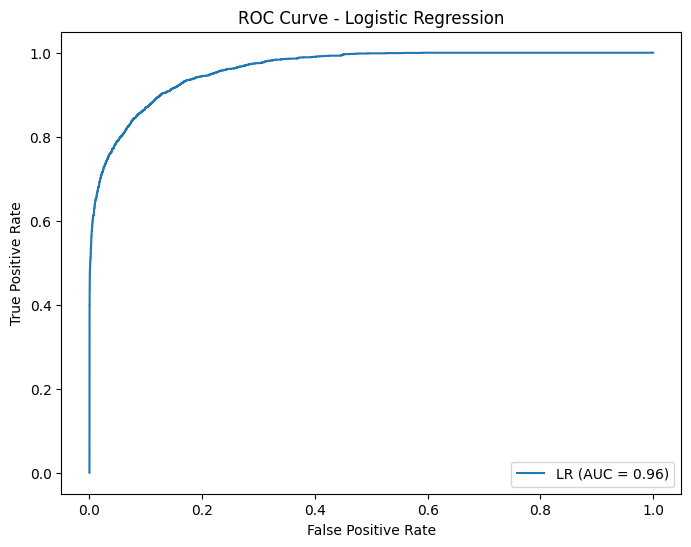

In [10]:
# Building a pipeline for Logistic Regression
pipe_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(solver='liblinear'))
])

# Training the model
pipe_lr.fit(X_train, Y_train)

# Predicting on test data
y_pred_lr = pipe_lr.predict(X_test)

# Displaying the classification report
print("Logistic Regression Classification Report:")
print(classification_report(Y_test, y_pred_lr))

# Plotting ROC Curve with AUC Score
y_proba_lr = pipe_lr.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, y_proba_lr)
roc_auc_lr = roc_auc_score(Y_test, y_proba_lr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'LR (AUC = {roc_auc_score(Y_test, y_proba_lr):.2f})')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend(loc='lower right')
plt.show()

# Storing results
results['Logistic Regression'] = {
    'ROC AUC': roc_auc_lr,
    'Classification Report': classification_report(Y_test, y_pred_lr, output_dict=True)
}

# B. Support Vector Machine (SVM) Model:

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     22875
           1       0.97      0.59      0.73      2125

    accuracy                           0.96     25000
   macro avg       0.97      0.79      0.86     25000
weighted avg       0.96      0.96      0.96     25000



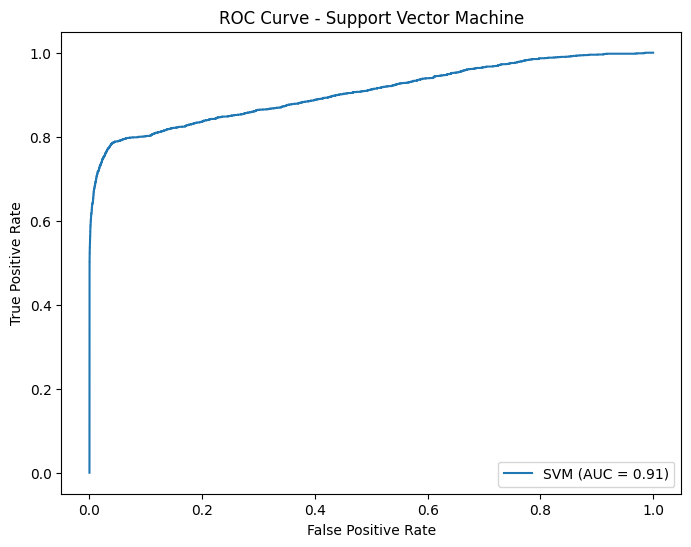

In [11]:
# Building a pipeline for SVM
pipe_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='rbf', probability=True, random_state=1))
])

# Training the model
pipe_svm.fit(X_train, Y_train)

# Predicting on test data
y_pred_svm = pipe_svm.predict(X_test)

# Displaying the classification report
print("SVM Classification Report:")
print(classification_report(Y_test, y_pred_svm))

# Plotting ROC curve with AUC score
y_proba_svm = pipe_svm.predict_proba(X_test)[:, 1]
roc_auc_svm = roc_auc_score(Y_test, y_proba_svm)
fpr, tpr, thresholds = roc_curve(Y_test, y_proba_svm)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'SVM (AUC = {roc_auc_svm:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Support Vector Machine')
plt.legend(loc='lower right')
plt.show()

# Storing results
results['SVM'] = {
    'ROC AUC': roc_auc_svm,
    'Classification Report': classification_report(Y_test, y_pred_svm, output_dict=True)
}

# C. Deep Learning Model:

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     22875
           1       0.98      0.69      0.81      2125

    accuracy                           0.97     25000
   macro avg       0.98      0.84      0.90     25000
weighted avg       0.97      0.97      0.97     25000



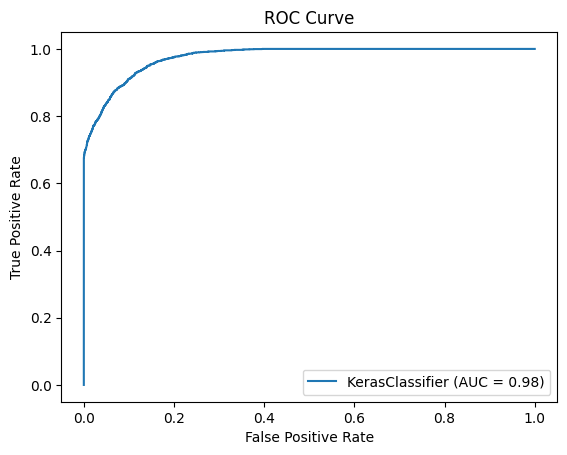

In [12]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define a function that creates the model, exactly as provided
def create_model():
    model = Sequential([
        Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='nadam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Wraping the Keras model using scikeras's KerasClassifier
keras_clf = KerasClassifier(model=create_model, epochs=50, batch_size=16, verbose=0)

# Training the model using the scaled data
keras_clf.fit(X_train_scaled, Y_train, validation_data=(X_test_scaled, Y_test))

# Predict on test data
y_pred = (keras_clf.predict(X_test_scaled) > 0.5).astype(int)

# Displaying the classification report
print("Classification Report:")
print(classification_report(Y_test, y_pred))

# ROC AUC score and ROC curve
y_proba = keras_clf.predict_proba(X_test_scaled)[:, 1]
roc_auc = roc_auc_score(Y_test, y_proba)
fpr, tpr, _ = roc_curve(Y_test, y_proba)

plt.plot(fpr, tpr, label=f'KerasClassifier (AUC = {roc_auc:.2f})')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Storing results
results['Deep Learning'] = {
    'ROC AUC': roc_auc,
    'Classification Report': classification_report(Y_test, y_pred, output_dict=True)
}


# **5. Summary:**

In [13]:
# Print a summary of each model's performance
for model_name, metrics in results.items():
    print(f"=== {model_name} ===")
    print("ROC AUC Score:", metrics['ROC AUC'])
    print("Classification Report:")
    # Convert the classification report dictionary to a DataFrame for neat printing
    report_df = pd.DataFrame(metrics['Classification Report']).transpose()
    print(report_df)
    print("\n")


=== Logistic Regression ===
ROC AUC Score: 0.9620563420122148
Classification Report:
              precision    recall  f1-score      support
0              0.967220  0.990645  0.978792  22875.00000
1              0.863781  0.638588  0.734307   2125.00000
accuracy       0.960720  0.960720  0.960720      0.96072
macro avg      0.915501  0.814617  0.856550  25000.00000
weighted avg   0.958428  0.960720  0.958011  25000.00000


=== SVM ===
ROC AUC Score: 0.9052089848923176
Classification Report:
              precision    recall  f1-score      support
0              0.963133  0.998164  0.980336  22875.00000
1              0.967517  0.588706  0.732007   2125.00000
accuracy       0.963360  0.963360  0.963360      0.96336
macro avg      0.965325  0.793435  0.856171  25000.00000
weighted avg   0.963506  0.963360  0.959228  25000.00000


=== Deep Learning ===
ROC AUC Score: 0.9759981176470587
Classification Report:
              precision    recall  f1-score      support
0              0.97179

# **6. Evaluation using a sample:**

In [14]:
# Sample data
samples = [
    ('Male', 67, 0, 1, 'not current', 27.32, 6.5, 200),
    ('Female', 4, 0, 0, 'No Info', 13.99, 4, 140)
]

# Define encoding mappings (same as used during training)
gender_mapping = {'Male': 2, 'Female': 1, 'Other': 0}
smoking_history_mapping = {
    "No Info": [1, 0, 0, 0, 0, 0],
    "current": [0, 1, 0, 0, 0, 0],
    "never": [0, 0, 1, 0, 0, 0],
    "former": [0, 0, 0, 1, 0, 0],
    "not current": [0, 0, 0, 0, 1, 0],
    "ever": [0, 0, 0, 0, 0, 1]
}

# Process the input samples into the required format
processed_samples = []
for sample in samples:
    gender = gender_mapping[sample[0]]
    age = sample[1]
    hypertension = sample[2]
    heart_disease = sample[3]
    smoking_history = smoking_history_mapping[sample[4]]
    bmi = sample[5]
    blood_glucose = sample[7]
    hba1c = sample[6]
    processed_samples.append([gender, age, hypertension, heart_disease] + smoking_history + [bmi, blood_glucose, hba1c])

# Convert to NumPy array and scale the data
processed_samples = np.array(processed_samples)
scaler = StandardScaler()
scaler.fit(X_train)  # Use the same scaler used during training
processed_samples_scaled = scaler.transform(processed_samples)  # Use the same scaler from training

models = {
    "Logistic Regression": {"model": pipe_lr, "f1": 0.73},
    "SVM": {"model": pipe_svm, "f1": 0.73},
    "Deep Learning": {"model": keras_clf, "f1": 0.81}
}

# Predict using all models
predictions = {}
for model_name, details in models.items():
    model = details["model"]
    predictions[model_name] = model.predict(processed_samples_scaled)

# Compute weighted sum and make final decision
final_decisions = []
for i in range(len(samples)):
    weighted_sum = sum(predictions[model_name][i] * models[model_name]["f1"] for model_name in models)
    total_auc = sum(models[model_name]["f1"] for model_name in models)
    final_decision = "Diabetes" if weighted_sum > (total_auc / 2) else "No Diabetes"
    final_decisions.append(final_decision)

# Display the results
for i, sample in enumerate(samples):
    print(f"\nSample {i+1}: {sample}")
    for model_name in models:
        outcome = "Diabetes" if predictions[model_name][i] == 1 else "No Diabetes"
        print(f"  {model_name}: {outcome} (F1 score: {models[model_name]['f1']})")
    print(f"  Final Decision (Weighted by F1 score): {final_decisions[i]}")


Sample 1: ('Male', 67, 0, 1, 'not current', 27.32, 6.5, 200)
  Logistic Regression: Diabetes (F1 score: 0.73)
  SVM: Diabetes (F1 score: 0.73)
  Deep Learning: No Diabetes (F1 score: 0.81)
  Final Decision (Weighted by F1 score): Diabetes

Sample 2: ('Female', 4, 0, 0, 'No Info', 13.99, 4, 140)
  Logistic Regression: Diabetes (F1 score: 0.73)
  SVM: Diabetes (F1 score: 0.73)
  Deep Learning: No Diabetes (F1 score: 0.81)
  Final Decision (Weighted by F1 score): Diabetes


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
